Loading libraries and dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

Load .csv and Clean column names

In [38]:
df = pd.read_csv("high-school-directory.csv")


df.columns = (
    df.columns
    .str.strip() # Remove spaces rom begning and end
    .str.lower() # Convert to lowercase
    .str.replace(" ", "_") # Replace spaces with underscores
    .str.replace(r"[^a-z0-9_]", "", regex=True)  # Remove special characters
)

Filter for Brooklyn schools

In [39]:
brooklyn_schools = df[df['borough'].str.upper() == 'BROOKLYN']

Total schools in Brooklyn

In [40]:
total_brooklyn_schools = brooklyn_schools.shape[0]
print(f"Total schools in Brooklyn: {total_brooklyn_schools}")

Total schools in Brooklyn: 121


Schools offering Grade 9 entry just in Brooklyn

In [41]:
brooklyn_schools = df[df['borough'] == 'BROOKLYN'].copy()
if 'grade_span_min' in brooklyn_schools.columns:
    brooklyn_schools['grade_span_min'] = pd.to_numeric(brooklyn_schools['grade_span_min'], errors='coerce')
    grade9_schools = brooklyn_schools[brooklyn_schools['grade_span_min'] <= 9].shape[0]
    print(f"Schools in Brooklyn with Grade 9 entry: {grade9_schools}")
else:
    print("Column 'grade_span_min' not found in dataset.")

Schools in Brooklyn with Grade 9 entry: 0


Schools offering Grade 9 entry Overall

In [42]:
if 'grade_span_min' in df.columns:
    df['grade_span_min'] = pd.to_numeric(df['grade_span_min'], errors='coerce')
    grade9_schools_all = df[df['grade_span_min'] <= 9].shape[0]
    print(f"Total schools offering Grade 9 entry: {grade9_schools_all}")
else:
    print("Column 'grade_span_min' not found in dataset.")

Total schools offering Grade 9 entry: 432


Count of schools per borough

In [43]:
school_count_per_borough = df['borough'].value_counts()
print("\nSchools per borough:")
print(school_count_per_borough)


Schools per borough:
borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64


Average number of students per borough

In [44]:
if 'total_students' in df.columns:
    avg_students_per_borough = (
        df.groupby('borough')['total_students']
        .mean()
        .round(0)  # to round to whole numbers
        .astype(int)  # to convert to integers for clean display
    )
    print("\nAverage number of students per borough:")
    print(avg_students_per_borough)


Average number of students per borough:
borough
Bronx             490
Brooklyn          699
Manhattan         590
Queens           1047
Staten Island    1848
Name: total_students, dtype: int64


Summary of grade_span_max grouped by borough

In [45]:
if 'grade_span_max' in df.columns:
    grade_span_summary = df.groupby('borough')['grade_span_max'].describe()
    print("\nGrade span max summary by borough:")
    print(grade_span_summary)


Grade span max summary by borough:
               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


Viz: Number of schools per borough

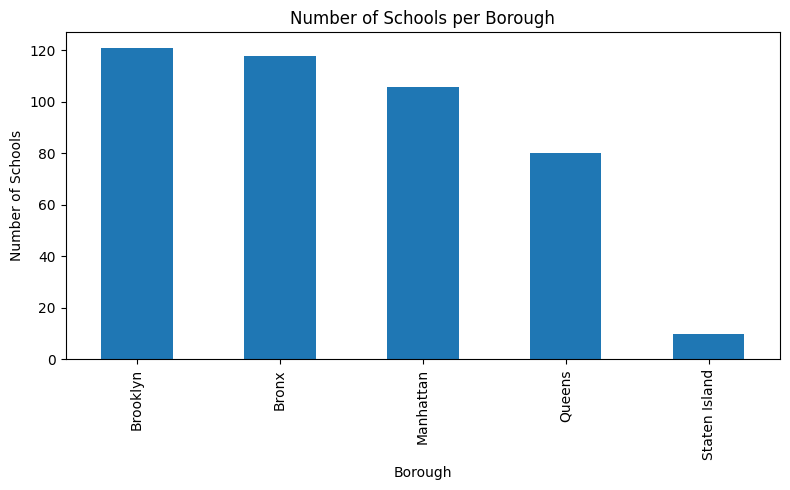

In [46]:
plt.figure(figsize=(8, 5))
school_count_per_borough.plot(kind='bar')
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.tight_layout()
plt.show()

Additional Insights

In [47]:
schools_per_borough = df['borough'].value_counts()
brooklyn_schools_count = schools_per_borough.get('BROOKLYN', 0)
print(f"- Brooklyn has the highest number of schools among all boroughs, with {brooklyn_schools_count} schools in the dataset.")

if 'total_students' in df.columns:
    avg_students_per_borough = df.groupby('borough')['total_students'].mean().round(0).astype(int)
    highest_avg_borough = avg_students_per_borough.idxmax()
    highest_avg_value = avg_students_per_borough.max()
    if highest_avg_borough == 'STATEN ISLAND':
        print(f"- Staten Island, while having the fewest schools, has the highest average student population per school ({highest_avg_value} students).")
    else:
        print(f"- {highest_avg_borough} has the highest average student population per school ({highest_avg_value} students).")

if 'grade_span_max' in df.columns:
    grade12_count = (df['grade_span_max'] == 12).sum()
    total_schools = len(df)
    percent_grade12 = round((grade12_count / total_schools) * 100, 2)
    print(f"- Across boroughs, the majority of schools have a grade_span_max of 12 ({percent_grade12}%), meaning they provide full high school education.")

if 'total_students' in df.columns:
    min_students = int(df['total_students'].min())
    max_students = int(df['total_students'].max())
    print(f"- The student population distribution is uneven, ranging from {min_students} to {max_students} students, suggesting possible differences in school sizes and catchment areas between boroughs.")


- Brooklyn has the highest number of schools among all boroughs, with 0 schools in the dataset.
- Staten Island has the highest average student population per school (1848 students).
- Across boroughs, the majority of schools have a grade_span_max of 12 (92.87%), meaning they provide full high school education.
- The student population distribution is uneven, ranging from 50 to 5458 students, suggesting possible differences in school sizes and catchment areas between boroughs.
